# **Homework #1**

 - **Academic Honesty**  
Plagiarism/cheating is strictly prohibited and against university policy. If any form of plagiarism is discovered, ALL students involved would receive an F score for this course (not just for HW).
 - **Collaboration Policy**   
Searching for online materials or discussing with fellow classmates are highly encouraged. However, you must provide the code or solution by yourself. Please specify, if any, the references for any parts of your HW solution in your report (e.g., the name and student ID of your collaborators
and/or the Internet URL you consult with). If you complete the assignment all by yourself, you must also specify “no collaborators”.
 - **Late HW Submission Policy**   
No late submission is allowed for this homework.

In [ ]:
# Import 需要的套件
import os
import numpy as np
import cv2
import pandas as pd
import time
import random
from PIL import Image
import matplotlib.pyplot as plt # plt 用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
from pandas import DataFrame

In [ ]:
# 固定隨機種子
def same_seeds(seed):
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.

same_seeds(0)

### **讀入我們的作業檔案**

In [ ]:
!gdown --id '1osVnm0yLZ281t0keMeEy0ea7N8TBZyxm' --output hw1.zip
!unzip hw1.zip

## **Problem 1: K-Means Clustering (24%)**

K-Means Clustering is an unsupervised learning algorithm for data grouping. In image segmentation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using
K-means clustering.

1. 
(10%) For K = 2, 4, 8, 16, and 32, perform K-means clustering on the provided bird.jpg by
taking the RGB values of each pixel as the feature of interest. Take a 64 × 64 pixel color image
for example, we have a total of 64 × 64 = 4096 data points for K-means clustering, and each
data point is described as a three dimensional vector (i.e., (R, G, B)). To visualize your image
segmentation results, plot the clustering results by replacing all pixels’ RGB value in each cluster
with the that of the corresponding cluster center.

In [ ]:
img = mpimg.imread('./hw1/bird.jpg')  # img.shape = (1024, 1024, 3)
seg_1 = img.reshape((-1, 3)) # seg_1.shape = (1024*1024, 3)

# convert to np.float32
seg_1 = np.float32(seg_1)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# a -type: 終止條件的類型，有如下3個flag: cv2.TERM_CRITERIA_EPS（精度滿足epsilon時，終止迭代）；cv2.TERM_CRITERIA_MAX_ITER（最大迭代次數達到後終止）；
#          cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER（二者滿足其一即可終止迭代）；
# b - max_iter:最大迭代次數；
# c - epsilon:精度；
# 設定好criteria，這裡最大迭代次數設定為10，誤差設定為1.0，且終止條件指定為不管達到誤差還是達到最大迭代次數，都將終止迭代。

K_LIST = [2, 4, 8, 16, 32]
K_img_list = []

for k in K_LIST:
    ret, label, center = cv2.kmeans(seg_1, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # 輸入參數：
    # - samples: 類型必須是np.float32型，每個特徵應該放置在單獨的一個列中；
    # - nclusters(K):最終要確定的類別數；
    # - criteria：迭代終止的條件，3通道參數，分別是（type, max_iter, epsilon）:
    # -attempts: 算法使用不同初始化標誌執行的次數，改算法返回最佳集聚性的標籤，該值作为輸出值返回；
    # - flags:用於指定如何初始化聚類中心，通常有兩種方式：cv2.KMEANS_PP_CENTERS（初始的K個點）和cv2.KMEANS_RANDOM_CENTERS（隨機產生的K個點）

    # 輸出參數：
    # - compactness: 集聚性，指每個點到相應聚類中心點的距離平方的和；
    # - labels：聚類的標識序列（‘0’， ‘1’......）；
    # - centers:聚類中心的序列

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    K_img_list.append(res2)
    print('finish k = ' + str(k))

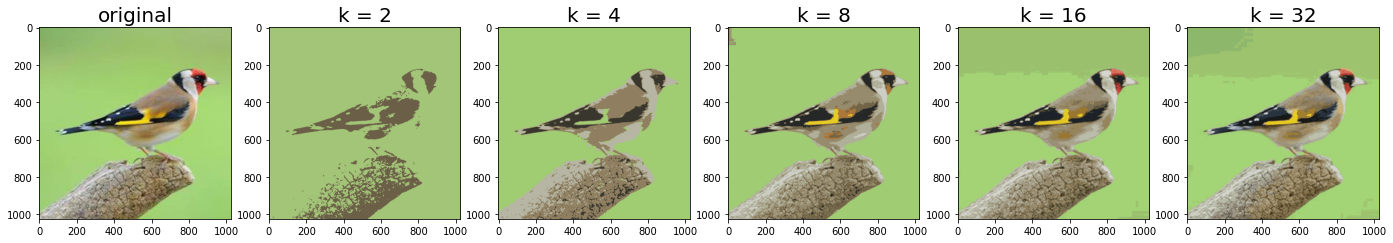

In [ ]:
plt.figure(figsize=(24, 24))

plt.subplot(1, 6, 1) 
plt.imshow(img)
plt.title("original", fontsize=20)

for i in range(len(K_img_list)):
    plt.subplot(1, 6, i+2)
    plt.title("k = " + str(K_LIST[i]), fontsize=20)
    plt.imshow(K_img_list[i])
plt.show()

2. (6%) Repeat 1. but take both RGB values and the location (x and y) as a five dimensional vector
as the feature for describing each pixel. Show the segmentation results.

In [ ]:
img_2 = np.ones([1024, 1024, 5])

In [ ]:
for x in range(1024):
    for y in range(1024):
        img_2[x][y] = np.concatenate((img[x][y], np.array([x, y])), axis=0)

In [ ]:
seg_2 = img_2.reshape((-1, 5)) # Z.shape = (1024*1024, 3)

# convert to np.float32
seg_2 = np.float32(seg_2)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K_LIST = [2, 4, 8, 16, 32]
K_img_list = []

for k in K_LIST:
    ret, label, center = cv2.kmeans(seg_2, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # ret, label, center = cv2.kmeans(seg_2, k, None, criteria, 20, cv2.KMEANS_PP_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res[:,:3].reshape((img.shape))
    K_img_list.append(res2)
    print('finish k = ' + str(k))

finish k = 2
finish k = 4
finish k = 8
finish k = 16
finish k = 32


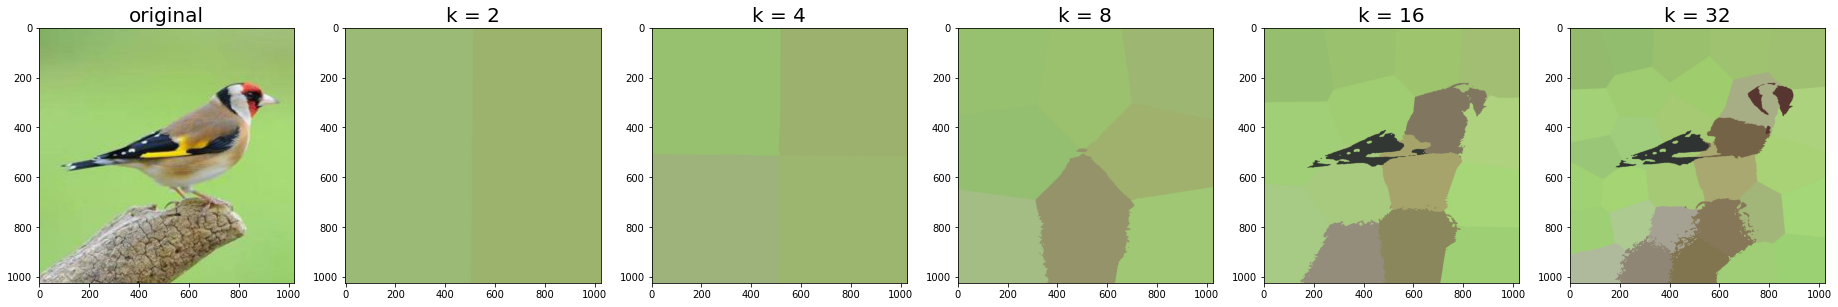

In [ ]:
plt.figure(figsize=(32, 32))

plt.subplot(1, 6, 1) 
plt.imshow(img)
plt.title("original", fontsize=20)

for i in range(len(K_img_list)):
    plt.subplot(1, 6, i+2) 
    plt.title("k = " + str(K_LIST[i]), fontsize=20)
    plt.imshow(K_img_list[i])
plt.show()

3. (8%) Compare your results obtained in 1. and 2., and briefly explain the differences between the
two methods under the same K. If further improved segmentation results would be desirable,
please provide possible modification or extension to the above feature definition (and visualize
your results).

In [ ]:
img_2 = np.ones([1024, 1024, 5])

In [ ]:
for x in range(1024):
    for y in range(1024):
        img_2[x][y] = np.concatenate((img[x][y], np.array([x, y])), axis=0)

In [ ]:
seg_2 = img_2.reshape((-1, 5))
# seg_2 = img_2.reshape((-1, 8))

# convert to np.float32
seg_2 = np.float32(seg_2)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
K_LIST = [2, 4, 8, 16, 32]
K_img_list = []

for k in K_LIST:
    ret, label, center = cv2.kmeans(seg_2, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res[:,:3].reshape((img.shape))
    K_img_list.append(res2)
    print('finish k = ' + str(k))

finish k = 2
finish k = 4
finish k = 8
finish k = 16
finish k = 32


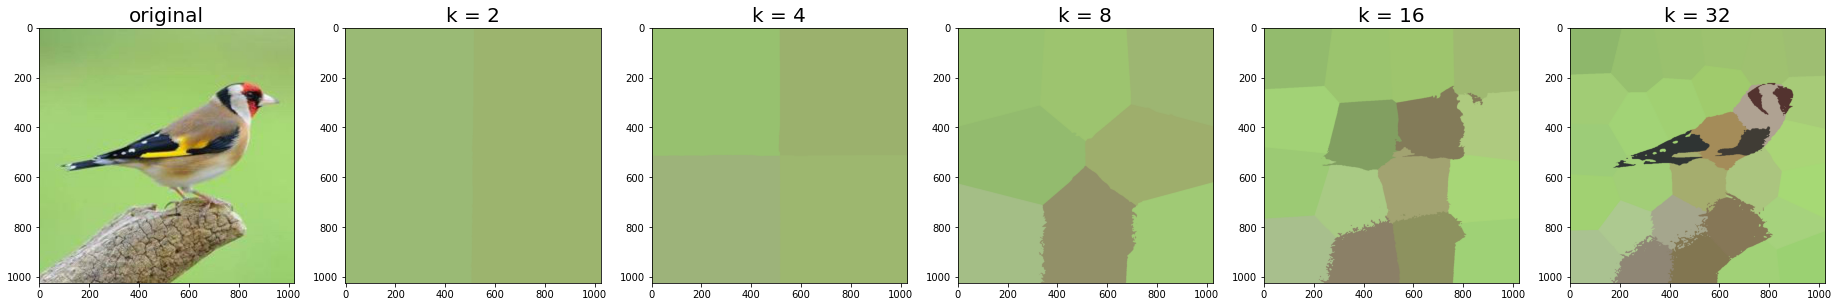

In [ ]:
plt.figure(figsize=(32, 32))

plt.subplot(1, 6, 1) 
plt.imshow(img)
plt.title("original", fontsize=20)

for i in range(len(K_img_list)):
    plt.subplot(1, 6, i+2) 
    plt.title("k = " + str(K_LIST[i]), fontsize=20)
    plt.imshow(K_img_list[i])
plt.show()

Hint
- When performing K-means clustering, your pixel values (RGB) should be in the range of [0, 255].
- In 2., x and y denote the horizontal and vertical distances (i.e., number of pixels in each direction
from the upper left corner of the image), respectively.

## **Problem 2: Principal Component Analysis (60%)**
Principal component analysis (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face
images.
The folder p2_data contains face images of 40 different subjects (classes) and 10 grayscale images for each subject, all of size (56, 46) pixels. Note that i_j.png is the j-th image of the i-th person, which is denoted as **person_i image_j** for simplicity.

First, split the dataset into two subsets (i.e., training and testing sets). The first subset contains the first 9 images of each subject, while the second subset contains the remaining images. Thus, a total of 9 × 40 = 360 images are in the training set, and 1 × 40 = 40 images in the testing set.
In this problem, you will compute the eigenfaces of the training set, and project face images from both the training and testing sets onto the same feature space with reduced dimension.

1. (15%) Perform PCA on the training set. Plot the mean face and the first four eigenfaces.

In [ ]:
training_set = []
testing_set = []
path = './hw1/p2_data' # 資料夾目錄
files = os.listdir(path) # 得到資料夾下的所有檔名稱
files.sort()
# 把資料順序整理好
for file in files:
    if('_10' in str(file)):
        testing_set.append([file, int(str(file).replace('_', '').replace('.png', ''))])
    else:
        training_set.append([file, int(str(file).replace('_', '').replace('.png', ''))])

In [ ]:
training_set = sorted(training_set, key = lambda s: s[1])
testing_set = sorted(testing_set, key = lambda s: s[1])
df_train = DataFrame(training_set, columns=['training_img', 'key'])['training_img']
df_test = DataFrame(testing_set, columns=['testing_img', 'key'])['testing_img']

In [ ]:
img = cv2.imread(path + '/' + df_train[0], cv2.IMREAD_GRAYSCALE)
arr_train = img
for i in range(len(df_train)-1):
    img = cv2.imread(path + '/' + df_train[i+1], cv2.IMREAD_GRAYSCALE)
    arr_train = np.concatenate((arr_train, img), axis=0)
arr_train = arr_train.reshape(360, 56, 46)

In [ ]:
fig, axes = plt.subplots(40, 9, figsize=(32, 16), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(arr_train[i], cmap='gray')

In [ ]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components = 0.8)
new_arr_train = faces_pca.fit(arr_train.reshape(360, -1))
# print(new_arr_train.explained_variance_ratio_) # show the variance for each eigenvector

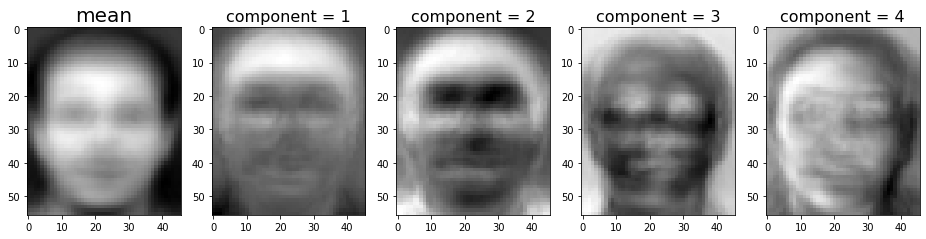

In [ ]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 5, 1) 
plt.imshow(new_arr_train.mean_.reshape(56, 46), cmap='gray')
plt.title('mean', fontsize=20)

for i in range(4):
    plt.subplot(1, 5, i+2) 
    plt.title("component = " + str(i+1), fontsize=16)
    plt.imshow(new_arr_train.components_[i].reshape(56, 46), cmap='gray')
plt.show()


2. (12%) Take **person_2 image_1**, and project it onto the PCA eigenspace you obtained above. Reconstruct this image using the first n = 3, 50, 170, 240, 345 eigenfaces. Plot the five reconstructed images.

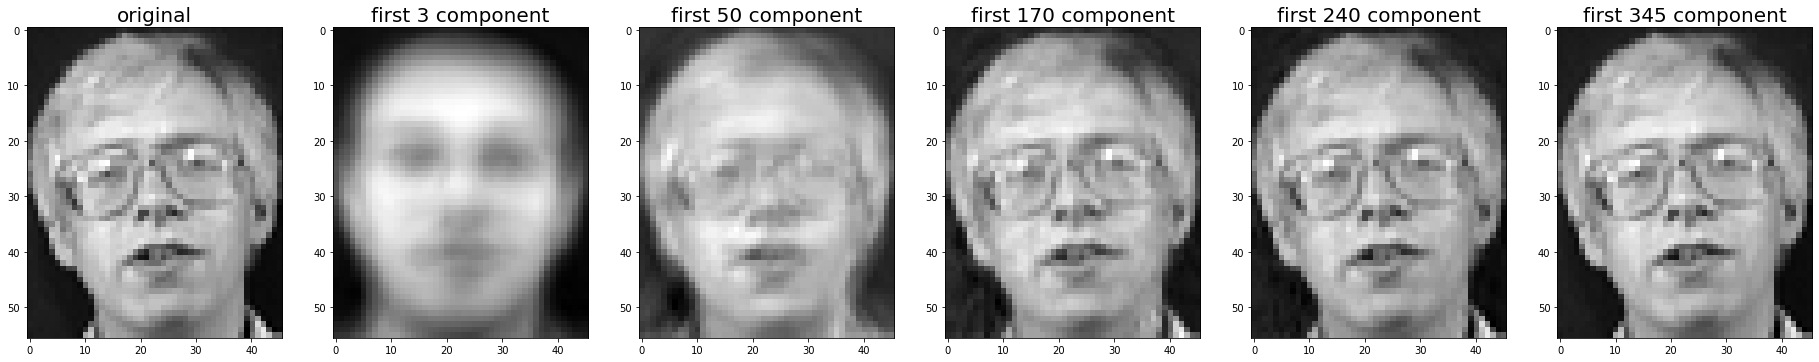

In [ ]:
from sklearn.decomposition import PCA
COMPONENT_LIST = [3, 50, 170, 240, 345]
reconstructed_img = []
new_face_list = []
projected_list = []

# # plot the original image
plt.figure(figsize=(32, 32))
plt.subplot(1, 6, 1) 
plt.imshow(arr_train[9].reshape(56, 46), cmap='gray')
plt.title('original', fontsize=20)

for n in range(len(COMPONENT_LIST)):
    faces_pca = PCA(n_components = COMPONENT_LIST[n])
    new_arr_train = faces_pca.fit(arr_train.reshape(360, -1))
    # print(new_arr_train.explained_variance_ratio_) # show the variance for each eigenvector

    new_face = new_arr_train.transform(arr_train.reshape(360, -1))
    new_face_list.append(new_face)
    
    projected = new_arr_train.inverse_transform(new_face)
    projected_list.append(projected)
    plt.subplot(1, 6, n+2) 
    plt.imshow(projected[9].reshape(56, 46), cmap='gray')
    reconstructed_img.append(projected[9].reshape(56, 46))
    plt.title("first " + str(COMPONENT_LIST[n]) + " component", fontsize=20)


3. (6%) For each of the four images you obtained in 2., compute the mean squared error (MSE)
between the reconstructed image and the original image. Record the corresponding MSE values
in your report.

In [ ]:
MSE = []
for n in range(len(reconstructed_img)):
    MSE.append(np.sum((reconstructed_img[n] - arr_train[9])**2)/(56*46))
    print("for n =", COMPONENT_LIST[n], ", MSE =", MSE[n])

4. (15%) Now, apply the k-nearest neighbors algorithm to classify the testing set images. First, you will need to determine the best k and n values by 3-fold cross-validation. For simplicity, the choices for such hyperparameters are k = {1, 3, 5} and n = {3, 50, 170}. Show the cross-
validation results and explain your choice for (k, n).

In [ ]:
# 載入適當模型模組
from sklearn.neighbors import KNeighborsClassifier # 使用KNN演算法
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# 設定好 train_x, train_y 資料
# train_x_n_set = projected_list[:3]
train_x_n_set = new_face_list[:3]
train_y = np.zeros([360, ])
for i in range(40):
    for j in range(9):
        train_y[i*9 + j] = i

In [ ]:
KNN_LIST = [1, 3, 5]
accuracy = []
for n in range(len(train_x_n_set[:3])): # from component = 3, 50, 170
    for k in KNN_LIST: # from k = 1, 3, 5
        for fold in range(3): # (train, val) = ((1, 2), 3), ((1, 3), 3), ((2, 3), 1)
            train_x_1, train_x_3, train_y_1, train_y_3 = train_test_split(train_x_n_set[n], train_y, test_size = 1/3, random_state = 3)
            train_x_2 = np.split(train_x_1, 2, axis = 0)[1]
            train_x_1 = np.split(train_x_1, 2, axis = 0)[0]
            train_y_2 = np.split(train_y_1, 2, axis = 0)[1]
            train_y_1 = np.split(train_y_1, 2, axis = 0)[0]

            clf = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance', algorithm='brute')
            # 主要模型: KNeighborsClassifier
            # n_neighbors: 要取幾個鄰居
            # p: 選擇距離的計算方式
            # weights: 投票方式為距離等權重或加權
            # algorithm:演算法的選擇 (計算效率的考慮)
            if fold == 0:
                clf.fit(np.concatenate((train_x_1, train_x_2), axis=0), np.concatenate((train_y_1, train_y_2), axis=0))
                clf.predict(train_x_3)
                score_1 = clf.score(train_x_3, train_y_3)

            elif fold == 1:
                clf.fit(np.concatenate((train_x_1, train_x_3), axis=0), np.concatenate((train_y_1, train_y_3), axis=0))
                clf.predict(train_x_2)
                score_2 = clf.score(train_x_2, train_y_2)

            else:
                clf.fit(np.concatenate((train_x_2, train_x_3), axis=0), np.concatenate((train_y_2, train_y_3), axis=0))
                clf.predict(train_x_1)
                score_3 = clf.score(train_x_1, train_y_1)

        accuracy.append((score_1+score_2+score_3)/3)
        print("for n =", COMPONENT_LIST[n], ", k =", k, ", score =", (score_1+score_2+score_3)/3)

for n = 3 , k = 1 , score = 0.6916666666666668
for n = 3 , k = 3 , score = 0.6611111111111111
for n = 3 , k = 5 , score = 0.6555555555555556
for n = 50 , k = 1 , score = 0.9583333333333334
for n = 50 , k = 3 , score = 0.9444444444444443
for n = 50 , k = 5 , score = 0.9111111111111111
for n = 170 , k = 1 , score = 0.9555555555555556
for n = 170 , k = 3 , score = 0.9305555555555557
for n = 170 , k = 5 , score = 0.8777777777777778


5. (12%) Use your hyperparameter choice in 4. and report the recognition rate of the testing set.

In [ ]:
# choose n = 170, k = 1
# 先把 test img 變成 array
img = cv2.imread(path + '/' + df_test[0], cv2.IMREAD_GRAYSCALE)
arr_test = img
for i in range(len(df_test)-1):
    img = cv2.imread(path + '/' + df_test[i+1], cv2.IMREAD_GRAYSCALE)
    arr_test = np.concatenate((arr_test, img), axis=0)

arr_test = arr_test.reshape(40, 56, 46)
test_y = np.zeros([40, ])
for i in range(40):
    test_y[i] = i

In [ ]:
faces_pca = PCA(n_components = COMPONENT_LIST[2]) # n = 170
new_arr_train = faces_pca.fit(arr_train.reshape(360, -1))

test_x = new_arr_train.transform(arr_test.reshape(40, -1))
# test_x = new_arr_train.inverse_transform(new_face)

clf = KNeighborsClassifier(n_neighbors=1, p=2, weights='distance', algorithm='brute')
clf.fit(train_x_n_set[2], train_y)
clf.predict(test_x)
score_predict = clf.score(test_x, test_y)
print("predicted score =", score_predict)

Hint
- When plotting eigenfaces, be sure to start from the most dominant one to the least dominant
one. Note that the calculated eigenvalues may be sorted in either ascending or descending order
depending on the programming language/packages you use.
- Display your output faces in grayscale colormap instead of other ones.
- When calculating MSE, your pixel values should be in the range of [0, 255].

## **Problem 3: Image Filtering (36%)**
Image filtering is a basic method to smoothen or sharpen an image. The general operation of image filtering is to compute the function of local neighborhood and output the new value for each pixel of interest. For example, a 3 × 3 box filter simply replaces the value of each pixel of interest with average values of itself and its eight neighbors. For more details about image filtering, please refer to the slides.
In this problem, you will be implementing Gaussian filters and apply them to images for filtering purposes. Below is the definition of 2D kernel of a Gaussian filter:
2D kernel : G(x, y) = (1/(2πσ^2))*e^(−(x^2+y^2)/(2σ^2))

1. (12%) Implement a discrete 2D Gaussian filter using a 3 × 3 kernel with σ ≈ 1/(2*ln2) . Use the provided lena.png as input, and plot the output image in your report. Briefly describe the effect of the filter.    
參考資料：https://medium.com/@bob800530/python-gaussian-filter-%E6%A6%82%E5%BF%B5%E8%88%87%E5%AF%A6%E4%BD%9C-676aac52ea17

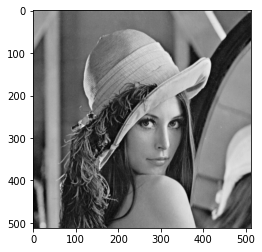

In [ ]:
img = cv2.imread('./hw1/lena.png', cv2.IMREAD_GRAYSCALE)  # img.shape = (1024, 1024, 3)
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.show()

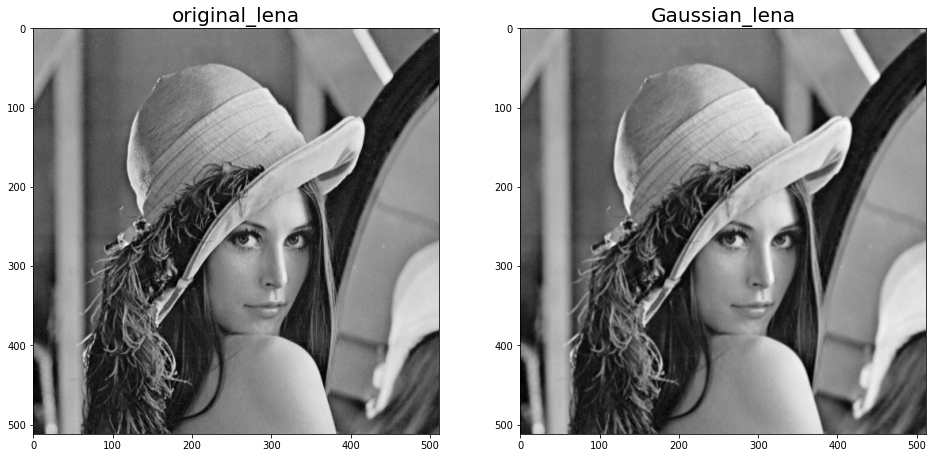

In [ ]:
import math
plt.figure(figsize=(16, 16))
kernel_size = (3, 3)
sigma = 1/(2*math.log(2))
blur = cv2.GaussianBlur(img, kernel_size, sigma)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("original_lena", fontsize=20)
plt.subplot(1, 2, 2) 
plt.imshow(blur, cmap="gray")
plt.title("Gaussian_lena", fontsize=20)
plt.show()

2. (16%) Consider the image I(x, y) as a function I : R
2 → R. When detecting edges in an image, it is often important to extract information from the derivatives of pixel values. Denote the derivatives as follows:

  Ix(x, y) = ∂I/∂x ≈ (1/2)*(I(x + 1, y) − I(x − 1, y))

  Iy(x, y) = ∂I/∂y ≈ (1/2)*(I(x, y + 1) − I(x, y − 1)).

  Implement the 1D convolution kernels kx ∈ R^1×3 and ky ∈ R^3×1 such that

  Ix = kx ∗ I    
  Iy = ky ∗ I.

  Write down your answers of kx and ky. Also, plot the resulting images Ix and Iy using the
provided lena.png as input.

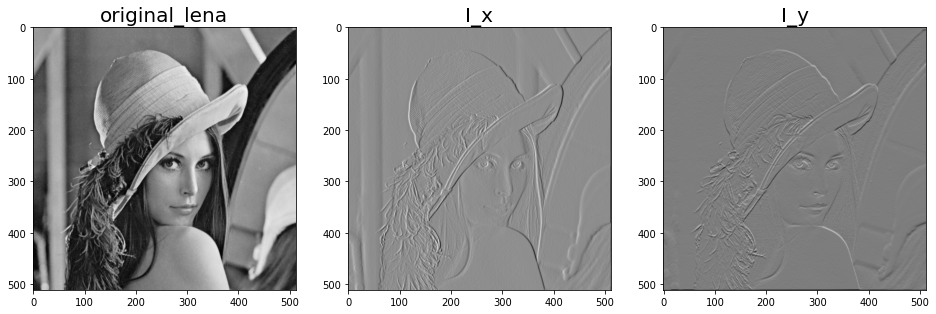

In [ ]:
def my_filters(image):
    Kx = 1/2*np.array([-1, 0, 1], np.float32)
    Ky = 1/2*np.array([[-1], [0], [1]], np.float32)
    img_padding_x = cv2.copyMakeBorder(image, 0, 0, 1, 1, cv2.BORDER_CONSTANT)
    img_padding_y = cv2.copyMakeBorder(image, 1, 1, 0, 0, cv2.BORDER_CONSTANT)
    img_transpose = img_padding_y.transpose()
    
    Ix = np.zeros([512, 512], np.float32)
    Iy = np.zeros([512, 512], np.float32)
    for y in range(len(image)):
        for x in range(len(image[0])):
            Ix[x][y] = np.dot(img_padding_x[x][y:y+3], Kx)
            Iy[x][y] = np.dot(img_transpose[x][y:y+3], Kx)

    return Ix, Iy.transpose()

plt.figure(figsize=(16, 16))
I_x, I_y = my_filters(img)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("original_lena", fontsize=20)
plt.subplot(1, 3, 2)
plt.imshow(I_x, cmap="gray")
plt.title("I_x", fontsize=20)
plt.subplot(1, 3, 3) 
plt.imshow(I_y, cmap="gray")
plt.title("I_y", fontsize=20)
plt.show()

3. (8%) Define the gradient magnitude image Im as   
Im(x, y) = (Ix(x, y)^2 + Iy(x, y)^2)^0.5.

  Use both the provided lena.png and the Gaussian-filtered image you obtained in 1. as input images. Plot the two output gradient magnitude images in your report. Briefly explain the differences in the results.

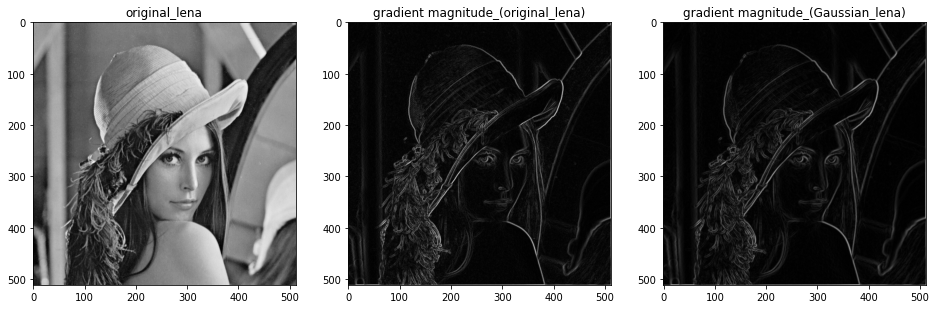

MSE = 11.5802583694458


In [ ]:
plt.figure(figsize=(16, 16))
I_x_original, I_y_original = my_filters(img)
I_x_Gaussian, I_y_Gaussian = my_filters(blur)
gradient_original = (I_x_original**2 + I_y_original**2)**0.5
gradient_Gaussian = (I_x_Gaussian**2 + I_y_Gaussian**2)**0.5

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("original_lena", fontsize=12)
plt.subplot(1, 3, 2)
plt.imshow(gradient_original, cmap="gray")
plt.title("gradient magnitude_(original_lena)", fontsize=12)
plt.subplot(1, 3, 3) 
plt.imshow(gradient_Gaussian, cmap="gray")
plt.title("gradient magnitude_(Gaussian_lena)", fontsize=12)
plt.show()

# print('MSE =', np.sum((img - blur)**2)/(512*512))
print('MSE =', np.sum((gradient_original - gradient_Gaussian)**2)/(512*512))

Hint
- When using lena.png for this problem, be sure to load it as a grayscale image.

## **Remarks**
 - For this homework, we will not grade your source code. Thus, you may use any programming
language you feel comfortable with. You are also allowed to use any related packages, libraries,
and functions for your implementation. However, you must provide image outputs with detailed
discussions or explanations.   
 - Please convert your report into a single .pdf file (with arbitrary file name) and upload it to
CEIBA before the deadline. You do NOT need to upload anything other than the pdf report for
this homework.